# Stock Price Prediction Problem

## Loading and Handling Data into Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
data = pd.read_csv('FB.csv')
print(data.head())

         Date       Open       High        Low      Close  Adj Close  \
0  2012-05-24  32.950001  33.209999  31.770000  33.029999  33.029999   
1  2012-05-25  32.900002  32.950001  31.110001  31.910000  31.910000   
2  2012-05-29  31.480000  31.690001  28.650000  28.840000  28.840000   
3  2012-05-30  28.700001  29.549999  27.860001  28.190001  28.190001   
4  2012-05-31  28.549999  29.670000  26.830000  29.600000  29.600000   

      Volume  
0   50237200  
1   37149800  
2   78063400  
3   57267900  
4  111639200  


Reading as datetime format:

In [3]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
# dateparse('1962-01')
data = pd.read_csv('FB.csv',index_col='Date',date_parser=dateparse)
print(data.head())

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2012-05-24  32.950001  33.209999  31.770000  33.029999  33.029999   50237200
2012-05-25  32.900002  32.950001  31.110001  31.910000  31.910000   37149800
2012-05-29  31.480000  31.690001  28.650000  28.840000  28.840000   78063400
2012-05-30  28.700001  29.549999  27.860001  28.190001  28.190001   57267900
2012-05-31  28.549999  29.670000  26.830000  29.600000  29.600000  111639200


In [4]:
#check datatype of index
data.index

DatetimeIndex(['2012-05-24', '2012-05-25', '2012-05-29', '2012-05-30',
               '2012-05-31', '2012-06-01', '2012-06-04', '2012-06-05',
               '2012-06-06', '2012-06-07',
               ...
               '2018-05-11', '2018-05-14', '2018-05-15', '2018-05-16',
               '2018-05-17', '2018-05-18', '2018-05-21', '2018-05-22',
               '2018-05-23', '2018-05-24'],
              dtype='datetime64[ns]', name='Date', length=1510, freq=None)

In [5]:
#convert to time series:
ts = data['Adj Close']
ts.head(10)

Date
2012-05-24    33.029999
2012-05-25    31.910000
2012-05-29    28.840000
2012-05-30    28.190001
2012-05-31    29.600000
2012-06-01    27.719999
2012-06-04    26.900000
2012-06-05    25.870001
2012-06-06    26.809999
2012-06-07    26.309999
Name: Adj Close, dtype: float64

### Indexing TS arrays:

In [6]:
#1. Specific the index as a string constant:
ts['2012-05-29']

28.84

In [7]:
#2. Import the datetime library and use 'datetime' function:
from datetime import datetime
ts[datetime(2015, 3, 26)]

83.010002

#Get range:

In [8]:
#1. Specify the entire range:
ts['2012-05-24':'2018-05-24']

Date
2012-05-24     33.029999
2012-05-25     31.910000
2012-05-29     28.840000
2012-05-30     28.190001
2012-05-31     29.600000
2012-06-01     27.719999
2012-06-04     26.900000
2012-06-05     25.870001
2012-06-06     26.809999
2012-06-07     26.309999
2012-06-08     27.100000
2012-06-11     27.010000
2012-06-12     27.400000
2012-06-13     27.270000
2012-06-14     28.290001
2012-06-15     30.010000
2012-06-18     31.410000
2012-06-19     31.910000
2012-06-20     31.600000
2012-06-21     31.840000
2012-06-22     33.049999
2012-06-25     32.060001
2012-06-26     33.099998
2012-06-27     32.230000
2012-06-28     31.360001
2012-06-29     31.100000
2012-07-02     30.770000
2012-07-03     31.200001
2012-07-05     31.469999
2012-07-06     31.730000
                 ...    
2018-04-13    164.520004
2018-04-16    164.830002
2018-04-17    168.660004
2018-04-18    166.360001
2018-04-19    168.100006
2018-04-20    166.279999
2018-04-23    165.839996
2018-04-24    159.690002
2018-04-25    159.69

In [9]:
#2. Use ':' if one of the indices is at ends:
ts[:'2015-03-26']

Date
2012-05-24    33.029999
2012-05-25    31.910000
2012-05-29    28.840000
2012-05-30    28.190001
2012-05-31    29.600000
2012-06-01    27.719999
2012-06-04    26.900000
2012-06-05    25.870001
2012-06-06    26.809999
2012-06-07    26.309999
2012-06-08    27.100000
2012-06-11    27.010000
2012-06-12    27.400000
2012-06-13    27.270000
2012-06-14    28.290001
2012-06-15    30.010000
2012-06-18    31.410000
2012-06-19    31.910000
2012-06-20    31.600000
2012-06-21    31.840000
2012-06-22    33.049999
2012-06-25    32.060001
2012-06-26    33.099998
2012-06-27    32.230000
2012-06-28    31.360001
2012-06-29    31.100000
2012-07-02    30.770000
2012-07-03    31.200001
2012-07-05    31.469999
2012-07-06    31.730000
                ...    
2015-02-12    76.230003
2015-02-13    75.739998
2015-02-17    75.599998
2015-02-18    76.709999
2015-02-19    79.419998
2015-02-20    79.900002
2015-02-23    78.839996
2015-02-24    78.449997
2015-02-25    79.559998
2015-02-26    80.410004
2015-02-27 

Note: ends included here

In [10]:
#All rows of 1962:
ts['2012']

Date
2012-05-24    33.029999
2012-05-25    31.910000
2012-05-29    28.840000
2012-05-30    28.190001
2012-05-31    29.600000
2012-06-01    27.719999
2012-06-04    26.900000
2012-06-05    25.870001
2012-06-06    26.809999
2012-06-07    26.309999
2012-06-08    27.100000
2012-06-11    27.010000
2012-06-12    27.400000
2012-06-13    27.270000
2012-06-14    28.290001
2012-06-15    30.010000
2012-06-18    31.410000
2012-06-19    31.910000
2012-06-20    31.600000
2012-06-21    31.840000
2012-06-22    33.049999
2012-06-25    32.060001
2012-06-26    33.099998
2012-06-27    32.230000
2012-06-28    31.360001
2012-06-29    31.100000
2012-07-02    30.770000
2012-07-03    31.200001
2012-07-05    31.469999
2012-07-06    31.730000
                ...    
2012-11-16    23.559999
2012-11-19    22.920000
2012-11-20    23.100000
2012-11-21    24.320000
2012-11-23    24.000000
2012-11-26    25.940001
2012-11-27    26.150000
2012-11-28    26.360001
2012-11-29    27.320000
2012-11-30    28.000000
2012-12-03 

# Checking for stationarity

## Plot the time-series

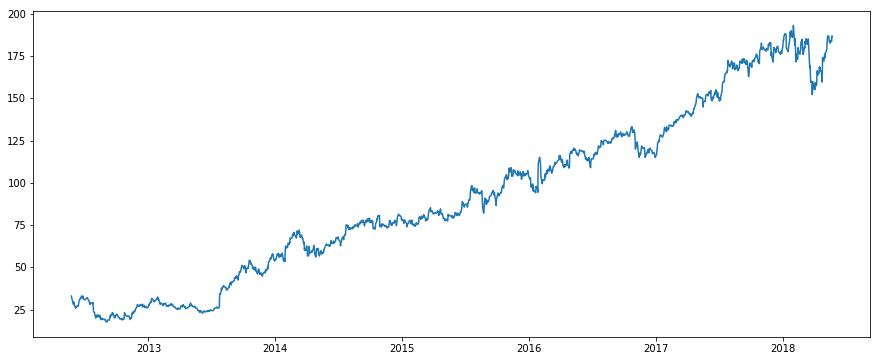

In [11]:
plt.plot(ts)

### Function for testing stationarity

In [12]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=20)
    rolstd = pd.rolling_std(timeseries, window=20)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['open','high','10_day_volatility', '50_day_moving_avg'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

C:\Users\divanshu\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


C:\Users\divanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  
C:\Users\divanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).std()
  import sys


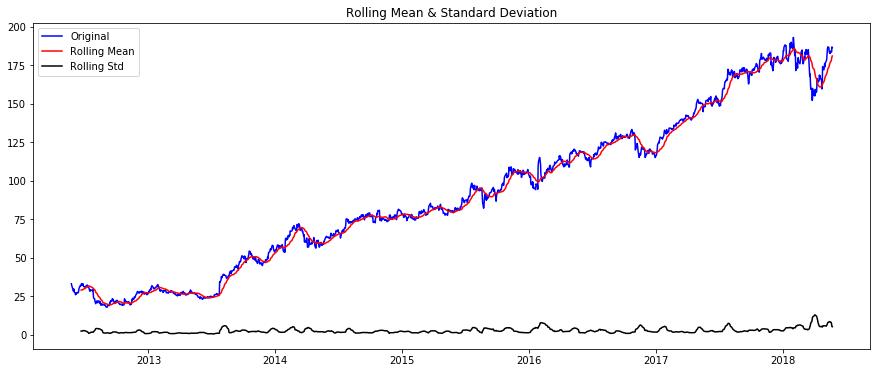

Results of Dickey-Fuller Test:
open                       0.255888
high                       0.975228
10_day_volatility          8.000000
50_day_moving_avg       1501.000000
Critical Value (1%)       -3.434714
Critical Value (5%)       -2.863467
Critical Value (10%)      -2.567796
dtype: float64


In [13]:
test_stationarity(ts)

# Making Data Stationary


## Estimating & Eliminating Trend


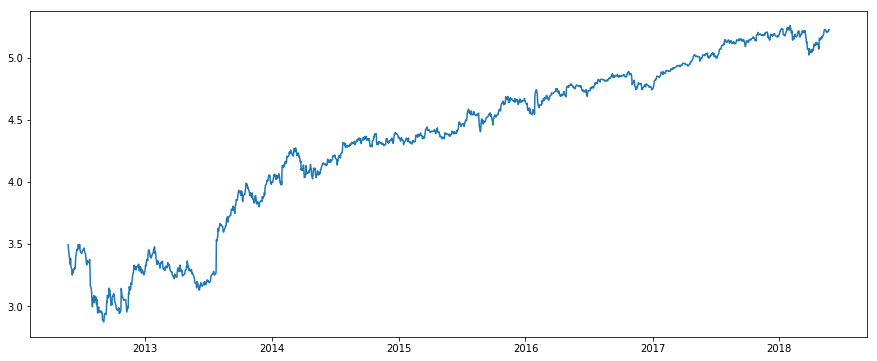

In [14]:
ts_log = np.log(ts)
plt.plot(ts_log)

## Smoothing:

### Moving average

C:\Users\divanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,min_periods=1,center=False).mean()
  """Entry point for launching an IPython kernel.


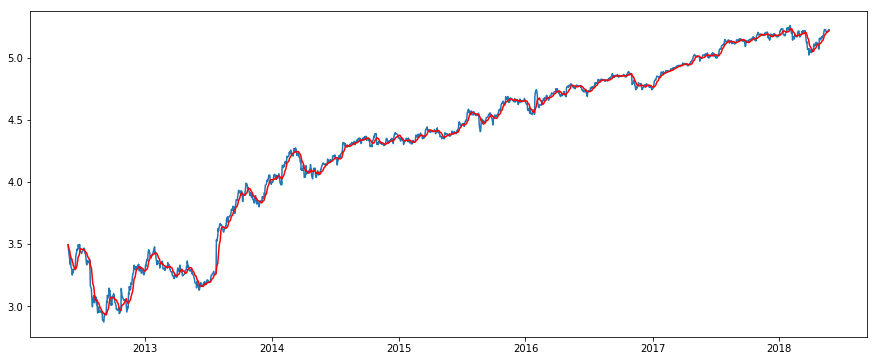

In [15]:
moving_avg = pd.rolling_mean(ts_log, 10, min_periods=1)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [16]:
print(moving_avg)

Date
2012-05-24    3.497416
2012-05-25    3.480168
2012-05-29    3.440700
2012-05-30    3.415267
2012-05-31    3.409768
2012-06-01    3.395166
2012-06-04    3.380446
2012-06-05    3.364526
2012-06-06    3.356109
2012-06-07    3.347493
2012-06-08    3.327705
2012-06-11    3.311033
2012-06-12    3.305911
2012-06-13    3.302593
2012-06-14    3.298067
2012-06-15    3.306004
2012-06-18    3.321504
2012-06-19    3.342488
2012-06-20    3.358926
2012-06-21    3.378004
2012-06-22    3.397852
2012-06-25    3.414993
2012-06-26    3.433892
2012-06-27    3.450603
2012-06-28    3.460905
2012-06-29    3.464473
2012-07-02    3.462414
2012-07-03    3.460164
2012-07-05    3.459752
2012-07-06    3.459406
                ...   
2018-04-13    5.075349
2018-04-16    5.081246
2018-04-17    5.088979
2018-04-18    5.095987
2018-04-19    5.101339
2018-04-20    5.106954
2018-04-23    5.111842
2018-04-24    5.108546
2018-04-25    5.104478
2018-04-26    5.110568
2018-04-27    5.115935
2018-04-30    5.120193
2018-0

In [17]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(15)

Date
2012-05-24    0.000000
2012-05-25   -0.017248
2012-05-29   -0.078936
2012-05-30   -0.076299
2012-05-31   -0.021994
2012-06-01   -0.073012
2012-06-04   -0.088320
2012-06-05   -0.111442
2012-06-06   -0.067334
2012-06-07   -0.077544
2012-06-08   -0.028171
2012-06-11   -0.014826
2012-06-12    0.004632
2012-06-13    0.003194
2012-06-14    0.044442
Name: Adj Close, dtype: float64

In [18]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

Date
2012-05-24    0.000000
2012-05-25   -0.017248
2012-05-29   -0.078936
2012-05-30   -0.076299
2012-05-31   -0.021994
Name: Adj Close, dtype: float64

C:\Users\divanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  
C:\Users\divanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).std()
  import sys


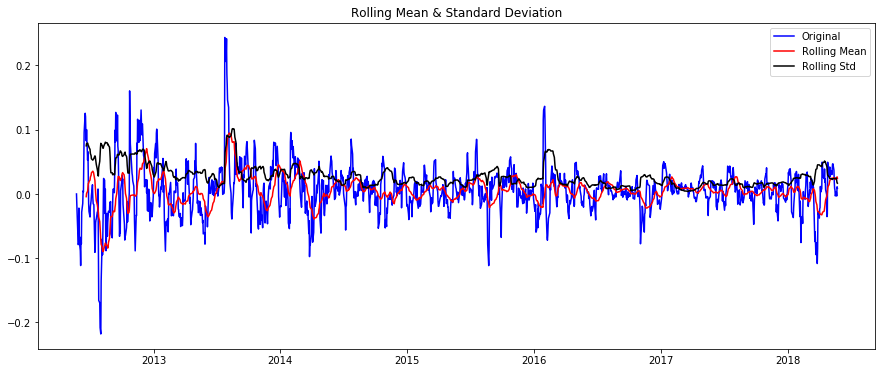

Results of Dickey-Fuller Test:
open                   -9.727314e+00
high                    9.200477e-17
10_day_volatility       9.000000e+00
50_day_moving_avg       1.500000e+03
Critical Value (1%)    -3.434717e+00
Critical Value (5%)    -2.863469e+00
Critical Value (10%)   -2.567797e+00
dtype: float64


In [19]:
test_stationarity(ts_log_moving_avg_diff)

### Exponentially Weighted Moving Average

C:\Users\divanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


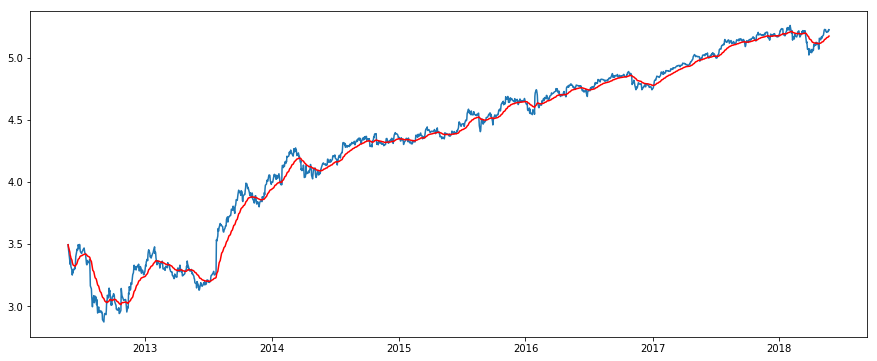

In [20]:
expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')
# expwighted_avg.plot(style='k--')

C:\Users\divanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  
C:\Users\divanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).std()
  import sys


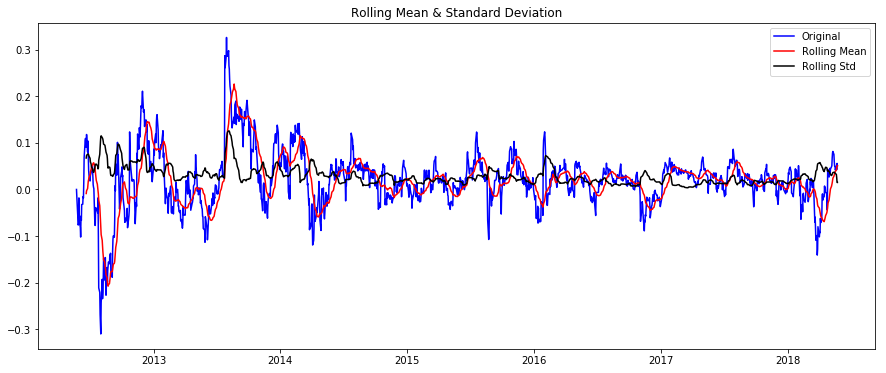

Results of Dickey-Fuller Test:
open                   -6.717310e+00
high                    3.555046e-09
10_day_volatility       0.000000e+00
50_day_moving_avg       1.509000e+03
Critical Value (1%)    -3.434691e+00
Critical Value (5%)    -2.863457e+00
Critical Value (10%)   -2.567791e+00
dtype: float64


In [21]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

## Eliminating Trend and Seasonality

### Differencing:

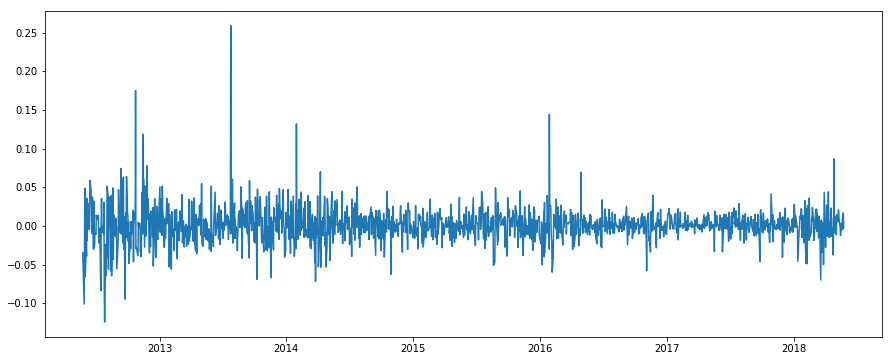

In [22]:
#Take first difference:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

C:\Users\divanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  
C:\Users\divanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).std()
  import sys


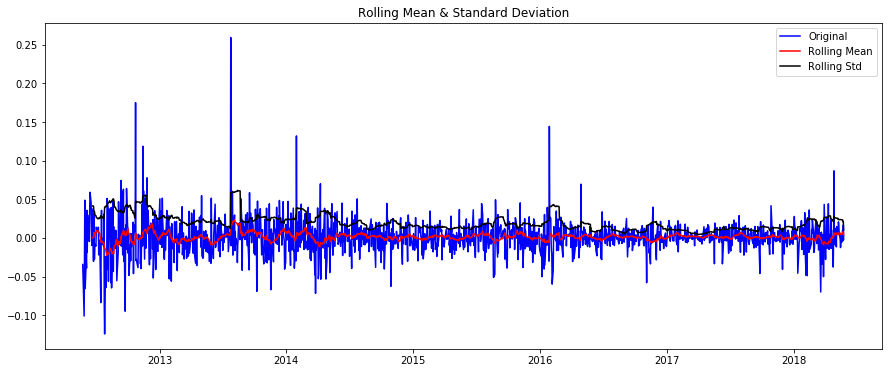

Results of Dickey-Fuller Test:
open                     -38.566518
high                       0.000000
10_day_volatility          0.000000
50_day_moving_avg       1508.000000
Critical Value (1%)       -3.434694
Critical Value (5%)       -2.863459
Critical Value (10%)      -2.567791
dtype: float64


In [23]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

### Decomposition:

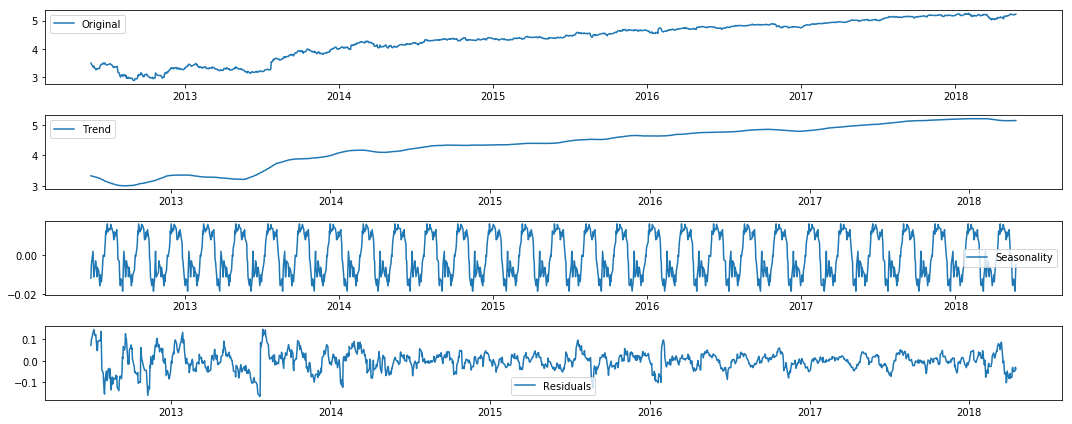

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, freq=52)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

C:\Users\divanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  
C:\Users\divanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).std()
  import sys


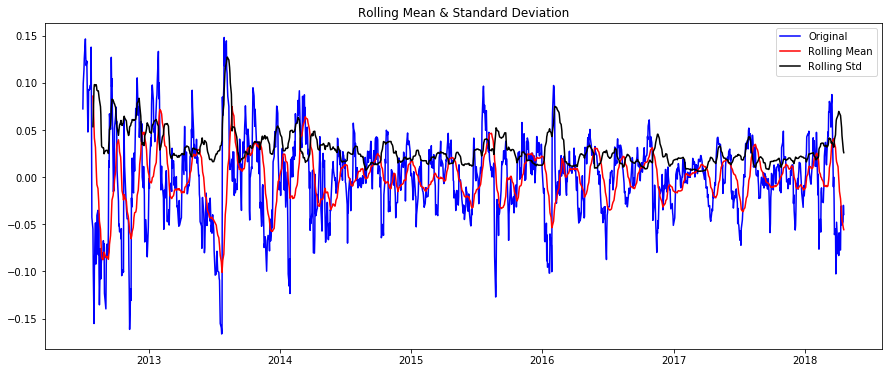

Results of Dickey-Fuller Test:
open                   -8.405364e+00
high                    2.174991e-13
10_day_volatility       2.200000e+01
50_day_moving_avg       1.435000e+03
Critical Value (1%)    -3.434915e+00
Critical Value (5%)    -2.863556e+00
Critical Value (10%)   -2.567843e+00
dtype: float64


In [25]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

# Final Forecasting

In [26]:
from statsmodels.tsa.arima_model import ARIMA

### ACF & PACF Plots

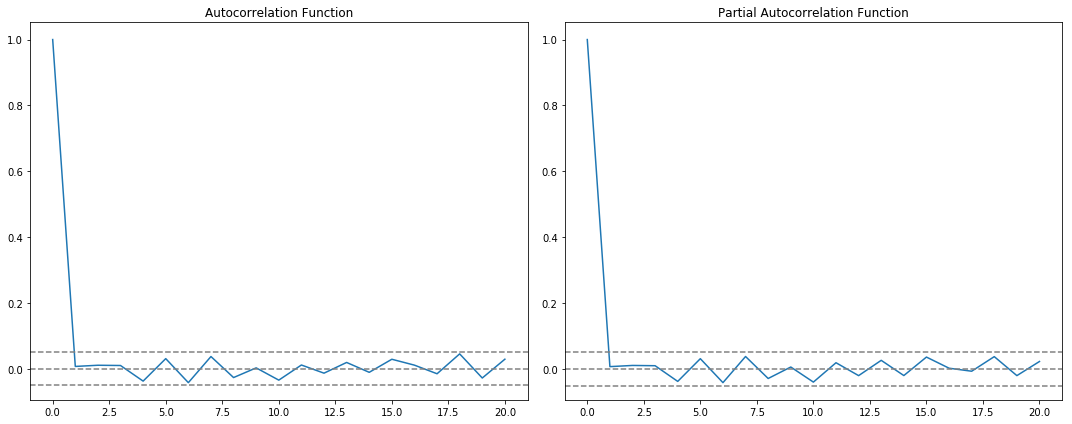

In [27]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

### AR Model:

C:\Users\divanshu\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\divanshu\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\divanshu\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Text(0.5,1,'RSS: 0.7666')

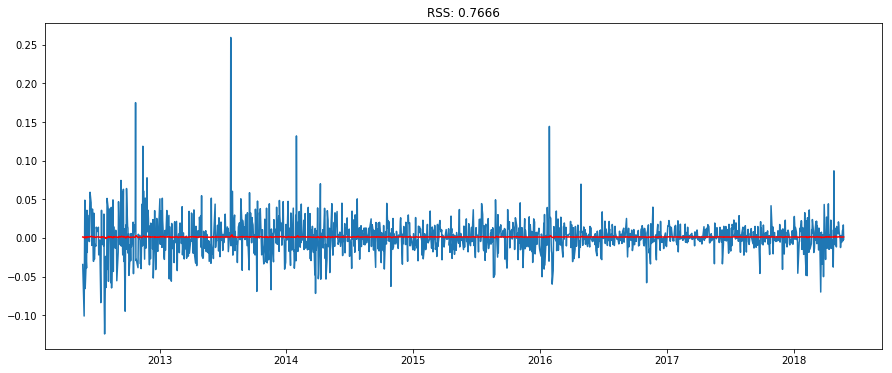

In [28]:
#MA model:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

### MA Model

C:\Users\divanshu\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\divanshu\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\divanshu\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Text(0.5,1,'RSS: 0.7666')

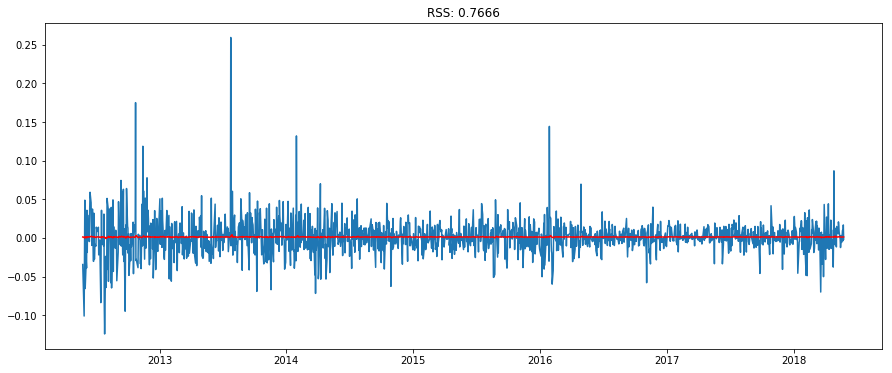

In [29]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

### ARIMA Model:

Text(0.5,1,'RSS (Root Squared Sum): 0.7668')

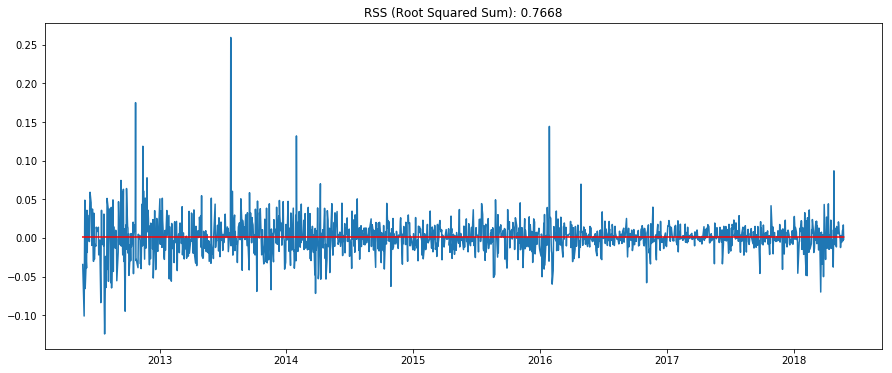

In [37]:
model = ARIMA(ts_log, order=(0, 1, 0))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS (Root Squared Sum): %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

### Convert to original scale:

In [39]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2012-05-25    0.001147
2012-05-29    0.001147
2012-05-30    0.001147
2012-05-31    0.001147
2012-06-01    0.001147
dtype: float64


In [41]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2012-05-25    0.001147
2012-05-29    0.002295
2012-05-30    0.003442
2012-05-31    0.004590
2012-06-01    0.005737
dtype: float64


In [42]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

C:\Users\divanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Date
2012-05-24    3.497416
2012-05-25    3.498564
2012-05-29    3.499711
2012-05-30    3.500858
2012-05-31    3.502006
dtype: float64

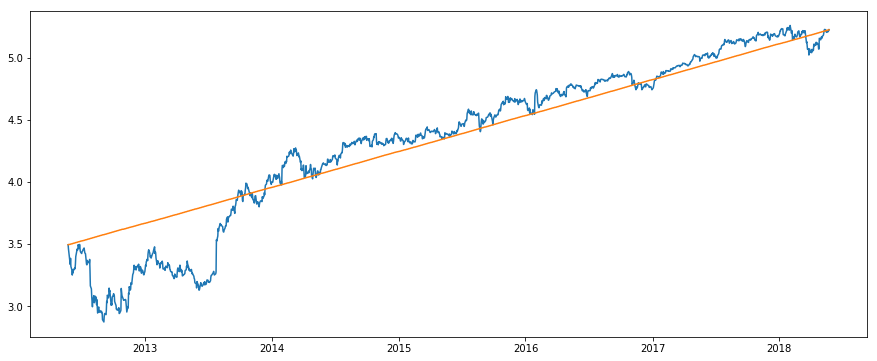

In [43]:
plt.plot(ts_log)
plt.plot(predictions_ARIMA_log)

Text(0.5,1,'RMSE: 11.4639')

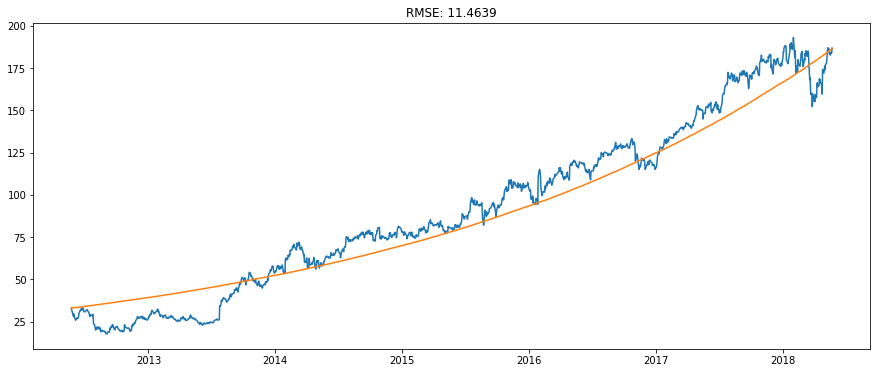

In [44]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))